In [53]:
%matplotlib inline
from ipywidgets import interact,widgets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
interact(plot_posts_price, name =['JR', 'hanwha'], percent=widgets.FloatSlider(min=0.04,max=0.99,step=0.05, value=0.85))


interactive(children=(Dropdown(description='name', options=('JR', 'hanwha'), value='JR'), FloatSlider(value=0.…

<function __main__.plot_posts_price(name, percent)>

In [51]:

def plot_posts_price(name,percent) :
    total = pd.read_csv(f'data/{name}_posts.csv',date_parser=True)
    total.drop(columns='Unnamed: 0',inplace=True)
    total.columns = ['datetime','id']
    total['datetime'] = pd.to_datetime(total['datetime'])
    total['day']= total['datetime'].dt.day
    total['month']= total['datetime'].dt.month
    total['year']= total['datetime'].dt.year
    total['date']= total['datetime'].dt.time
    # total.drop(columns='datetime',inplace=True)
    te = total.set_index('datetime')
    c = te.reset_index().groupby(pd.Grouper(key='datetime',freq='1D')).size()

    # BM = te.index >= '2021-03-01'
    # BM = (te.index > '2021-03-01') & (te.index < '2022-04-01')
    # a = te[BM]

    ## 가격 plot 불러오기
    sol = pd.read_excel(f'data/{name}_price.xlsx', date_parser=True)
    sol.set_index('일자',inplace=True)
    BM = sol.index >= '2021-03-01'
    sol_time = sol[BM]['종가']


    ### sol_time있는 게시글만 뽑기
    c = c[sol_time.index][c>np.quantile(c,percent)]

    # ### 전날 대비 post 증가개수
    # c_1 = np.concatenate((np.array([0]), c.values[:-1]))
    # k = c- c_1
    # k[k < 0] = 0
    


    ### plot
    fig, ax1 = plt.subplots(figsize=(14,6))
    color = 'tab:blue'
    ax1.bar(c.index,height=c,color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    # ax1.plot([c.index.min(), c.index.max()],[13,13], 'k:')
    ax2 = ax1.twinx()

    color = 'tab:red'
    ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
    ax2.plot(sol_time, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.plot(sol[BM]['60'], color='tab:green')
    ax2.plot(sol[BM]['20'], color='tab:gray')

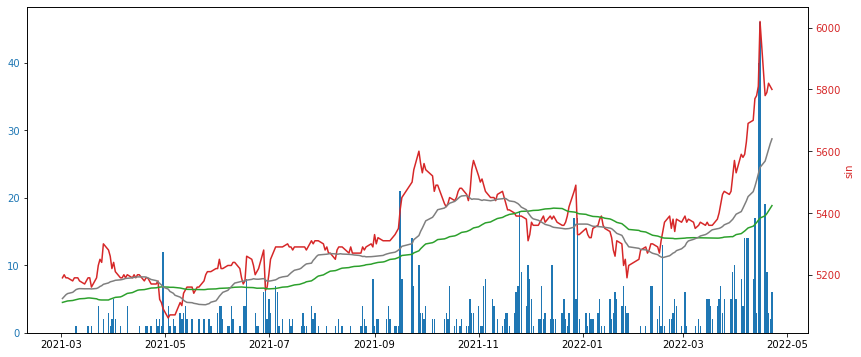

In [33]:
plot_posts_price('JR')

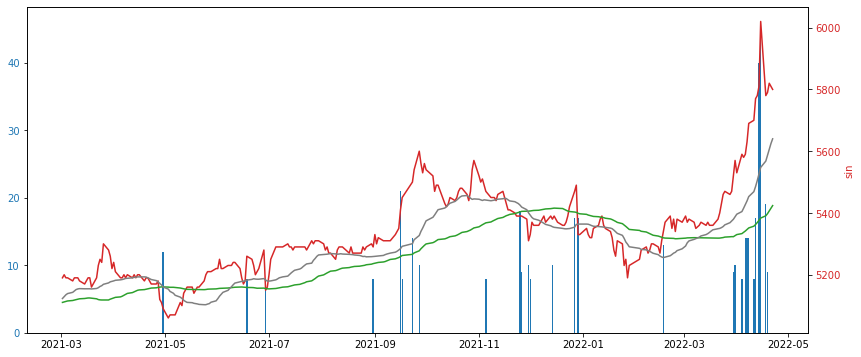

In [47]:
name ='JR'

total = pd.read_csv(f'data/{name}_posts.csv',date_parser=True)
total.drop(columns='Unnamed: 0',inplace=True)
total.columns = ['datetime','id']
total['datetime'] = pd.to_datetime(total['datetime'])
total['day']= total['datetime'].dt.day
total['month']= total['datetime'].dt.month
total['year']= total['datetime'].dt.year
total['date']= total['datetime'].dt.time
# total.drop(columns='datetime',inplace=True)
te = total.set_index('datetime')
c = te.reset_index().groupby(pd.Grouper(key='datetime',freq='1D')).size()

# BM = te.index >= '2021-03-01'
# BM = (te.index > '2021-03-01') & (te.index < '2022-04-01')
# a = te[BM]

## 가격 plot 불러오기
sol = pd.read_excel(f'data/{name}_price.xlsx', date_parser=True)
sol.set_index('일자',inplace=True)
BM = sol.index >= '2021-03-01'
sol_time = sol[BM]['종가']


### sol_time있는 게시글만 뽑기
c = c[sol_time.index][c>np.quantile(c,percent)]

# ### 전날 대비 post 증가개수
# c_1 = np.concatenate((np.array([0]), c.values[:-1]))
# k = c- c_1
# k[k < 0] = 0



### plot
fig, ax1 = plt.subplots(figsize=(14,6))
color = 'tab:blue'
ax1.bar(c.index,height=c,color=color)
ax1.tick_params(axis='y', labelcolor=color)
# ax1.plot([c.index.min(), c.index.max()],[13,13], 'k:')
ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(sol_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(sol[BM]['60'], color='tab:green')
ax2.plot(sol[BM]['20'], color='tab:gray')